# How Gradient Descent works - Utkarsh Gaikwad

# Generating a random data as an example

In [1]:
import pandas as pd
import numpy as np
rg = np.random.default_rng()

def generate_data(n_features,n_values):
    features = rg.random((n_features,n_values))
    weights = rg.random((1,n_values))[0]
    targets = np.random.choice([0,1],n_features)
    col = []
    for i in range(n_values):
        col.append('x'+str(i))
    data = pd.DataFrame(features,columns = col)
    data['targets']=targets
    return data, weights

In [2]:
data, weights = generate_data(100,3)
print('Initial weights are :',weights)
data

Initial weights are : [0.98585538 0.83618441 0.82812754]


,x0,x1,x2,targets
0,0.234106,0.604468,0.462643,0
1,0.324374,0.778261,0.065009,1
2,0.345673,0.443396,0.051487,0
3,0.082891,0.272165,0.917529,1
4,0.806188,0.010670,0.672644,1
...,...,...,...,...
95,0.619870,0.421211,0.046550,0
96,0.397076,0.285672,0.718713,1
97,0.529888,0.445661,0.945958,1
98,0.780776,0.314199,0.204357,1


# Weighted Sum Function

In [3]:
def get_weighted_sum(feature, weights, bias):
    return np.dot(feature,weights)+bias

# Defining Sigmoid Function

In [4]:
def sigmoid(w_sum):
    return 1/(1+np.exp(-w_sum))

# Defining Cross Entropy Loss function

In [5]:
def cross_entropy(target, prediction):
    return -(target*np.log10(prediction)+(1-target)*np.log10(1-prediction))

# Defining Weight Updating Function

In [6]:
def update_weights(weights, l_rate,target, prediction, feature):
    new_weights = []
    for x,w in zip(feature,weights):
        new_w = w + l_rate*(target-prediction)*x
        new_weights.append(new_w)
    return new_weights

# Defining Bias Updating Function

In [7]:
def update_bias(bias, l_rate, target, prediction):
    return bias + l_rate*(target-prediction)

# Specifying Bias and Learning Rate

In [8]:
bias = 0.5
l_rate = 0.01
epochs = 30
epoch_loss =[]

# Train Model Function

In [9]:
def train_model(data, weights, bias, l_rate, epochs):
    for e in range(epochs):
        individual_loss = []
        for i in range(len(data)):
            feature = data.loc[i][:-1]
            target = data.loc[i][-1]
            w_sum = get_weighted_sum(feature, weights, bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy(target,prediction)
            individual_loss.append(loss)
            #Gradient Descent
            weights = update_weights(weights, l_rate,target, prediction, feature)
            bias = update_bias(bias,l_rate,target,prediction)
        average_loss = sum(individual_loss)/len(individual_loss)
        epoch_loss.append(average_loss)
        print('********************')
        print('epoch',e)
        print('Cross Entropy Loss : ',average_loss)

# Training the actual Model

In [10]:
train_model(data, weights, bias, l_rate, epochs)

********************
epoch 0
Cross Entropy Loss :  0.43770568516471065
********************
epoch 1
Cross Entropy Loss :  0.367239214232494
********************
epoch 2
Cross Entropy Loss :  0.33055232527588907
********************
epoch 3
Cross Entropy Loss :  0.3135799106708268
********************
epoch 4
Cross Entropy Loss :  0.30619031794000223
********************
epoch 5
Cross Entropy Loss :  0.3030294360940687
********************
epoch 6
Cross Entropy Loss :  0.30165560779359496
********************
epoch 7
Cross Entropy Loss :  0.30102474221659026
********************
epoch 8
Cross Entropy Loss :  0.30070182347697605
********************
epoch 9
Cross Entropy Loss :  0.3005073695161017
********************
epoch 10
Cross Entropy Loss :  0.30036757096666655
********************
epoch 11
Cross Entropy Loss :  0.3002520900659422
********************
epoch 12
Cross Entropy Loss :  0.30014843812175096
********************
epoch 13
Cross Entropy Loss :  0.30005144812441714
********

# Plot Epoch Loss

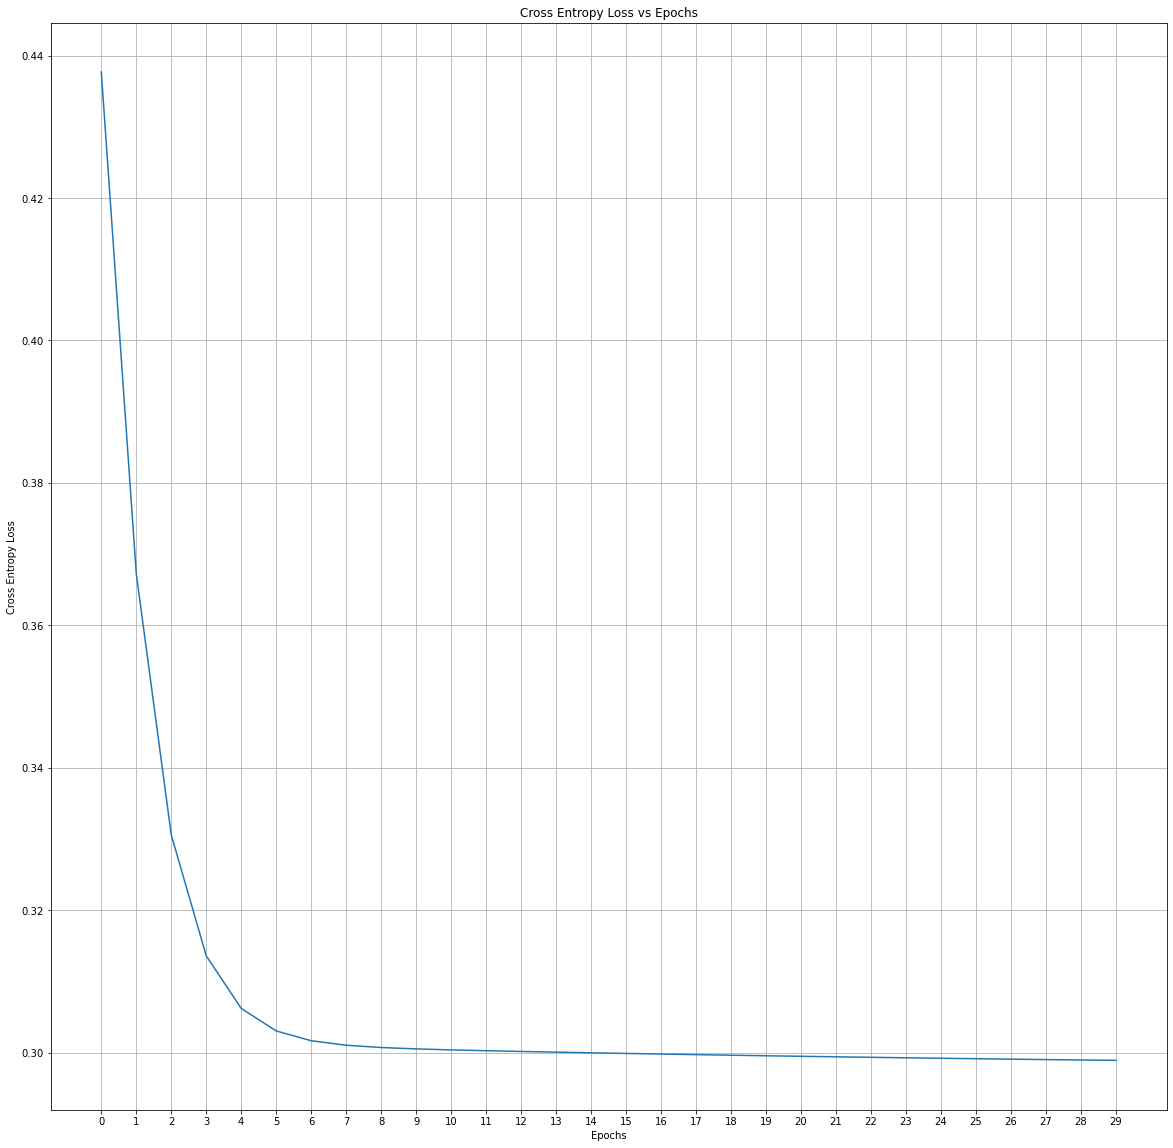

In [11]:
import matplotlib.pyplot as plt
df = pd.DataFrame(epoch_loss)
r = range(epochs)
plt.figure(figsize=(20,20))
plt.plot(df)
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss vs Epochs')
plt.xticks(r)
plt.grid()
plt.show()